## GHI
### The radiation reaching the earth's surface can be represented in a number of different ways. Global Horizontal Irradiance (GHI) is the total amount of shortwave radiation received from above by a surface horizontal to the ground.

### Task: We have to predict GHI after 48 hours that is total amount of solar radiation in future, given some independent weather features

In [1]:
!pip install pycaret

     |████████████████████████████████| 261 kB 872 kB/s 
     |████████████████████████████████| 14.2 MB 6.9 MB/s 
     |████████████████████████████████| 6.8 MB 15.4 MB/s 
     |████████████████████████████████| 102 kB 24.7 MB/s 
     |████████████████████████████████| 24.2 MB 75.5 MB/s 
     |████████████████████████████████| 167 kB 52.8 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 79 kB 5.4 MB/s 
     |████████████████████████████████| 1.1 MB 46.0 MB/s 
     |████████████████████████████████| 1.7 MB 60.3 MB/s 
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ | done
    Preparing wheel metadata ... - done
     |████████████████████████████████| 1.7 MB 42.5 MB/s 
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158155 sha256=3783edbeb9b0a9d39cd605fbdeb4043e4d36698f638cc78c8dc269b44d8780dc
  St

In [2]:
import pandas as pd 
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(color_codes=True)
pal = sns.color_palette("viridis", 10)
sns.set_palette(pal)

In [3]:
df = pd.read_csv('../input/weather-data/combined_data_from_2016_2019_with_out_extra_features.csv')

In [4]:
df.head()

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2016,1,1,0,0,0,0,1,2.2,177.77,0,0.17,1.1,1.2,167,40.16,15.7,974
1,2016,1,1,1,0,0,0,1,2.5,163.98,0,0.17,1.2,1.2,179,43.10,15.0,974
2,2016,1,1,2,0,0,0,1,2.8,150.22,0,0.17,1.2,1.2,188,44.81,14.7,974
3,2016,1,1,3,0,0,0,1,3.1,136.54,0,0.17,1.2,1.2,197,46.20,14.5,974
4,2016,1,1,4,0,0,0,1,3.3,122.99,0,0.17,1.2,1.2,201,48.00,14.2,974


## Checking for null values

In [5]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
GHI                   0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Solar Zenith Angle    0
Fill Flag             0
Surface Albedo        0
Wind Speed            0
Precipitable Water    0
Wind Direction        0
Relative Humidity     0
Temperature           0
Pressure              0
dtype: int64

### No null values

In [6]:
df.shape

(52584, 18)

In [7]:
df.head()

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2016,1,1,0,0,0,0,1,2.2,177.77,0,0.17,1.1,1.2,167,40.16,15.7,974
1,2016,1,1,1,0,0,0,1,2.5,163.98,0,0.17,1.2,1.2,179,43.10,15.0,974
2,2016,1,1,2,0,0,0,1,2.8,150.22,0,0.17,1.2,1.2,188,44.81,14.7,974
3,2016,1,1,3,0,0,0,1,3.1,136.54,0,0.17,1.2,1.2,197,46.20,14.5,974
4,2016,1,1,4,0,0,0,1,3.3,122.99,0,0.17,1.2,1.2,201,48.00,14.2,974


### Constructing Future GHI Feature(after 48 h)

In [8]:
l=[]
for i in range (96,df.shape[0]):
    l.append(df['GHI'][i])
    
df.drop(list(range(df.shape[0]-96,df.shape[0])),inplace=True)
df['GHI_after_48_hours'] = l

In [9]:
df=df[df['Year']>2017]

In [10]:
df

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,GHI_after_48_hours
17544,2018,1,1,0,0,0,0,0,-10.1,166.39,0,0.17,1.5,0.6,4,26.75,7.9,948,0
17545,2018,1,1,0,30,0,0,0,-10.1,163.50,0,0.17,1.5,0.6,181,27.68,7.4,948,0
17546,2018,1,1,1,0,0,0,0,-9.5,158.96,0,0.17,1.6,0.6,357,30.04,6.9,948,0
17547,2018,1,1,1,30,0,0,0,-9.5,153.61,0,0.17,1.6,0.6,356,30.87,6.5,948,0
17548,2018,1,1,2,0,0,0,0,-8.8,147.87,0,0.17,1.6,0.6,354,33.18,6.2,948,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52483,2019,12,29,21,30,0,0,7,-7.0,148.57,0,0.17,0.6,1.2,173,46.15,3.5,945,0
52484,2019,12,29,22,0,0,0,4,-6.8,154.29,0,0.17,0.7,1.2,1,47.47,3.3,945,0
52485,2019,12,29,22,30,0,0,7,-6.8,159.60,0,0.17,0.8,1.2,7,47.81,3.2,945,0
52486,2019,12,29,23,0,0,0,7,-6.3,164.05,0,0.17,0.9,1.2,13,50.60,3.0,945,0


In [11]:
l=[]
for i in df['Minute']:
    if i ==30:
        l.append(0.5)
    else:
        l.append(0)
        
df['Hour'] = df['Hour']+l

In [12]:
df.drop(['Clearsky GHI','GHI','Minute'],axis=1,inplace=True)

## Check Corelation

<AxesSubplot:>

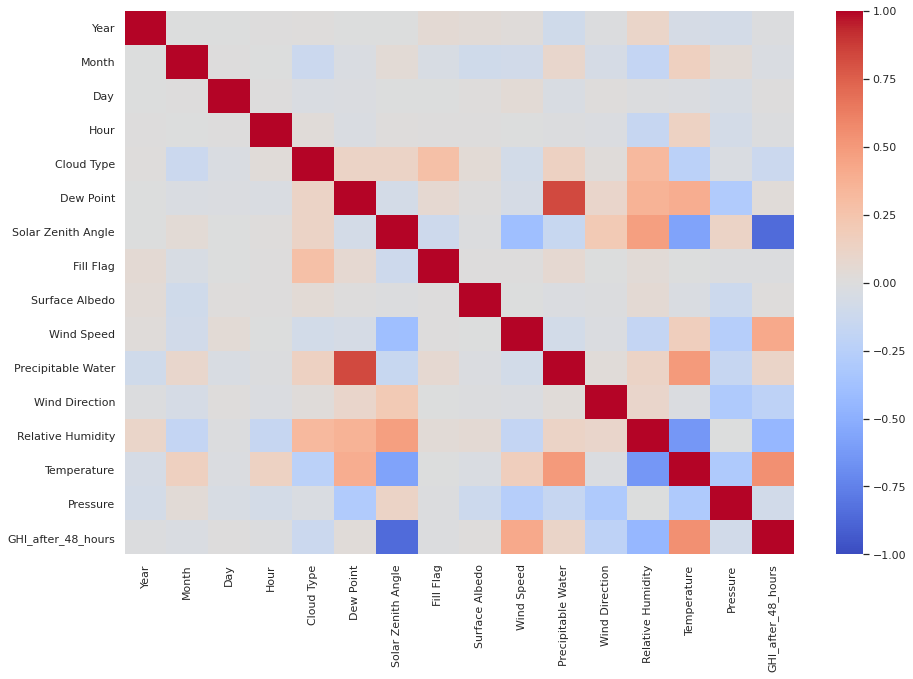

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(data= df.corr(), vmin=-1,vmax=1, cmap='coolwarm')

<AxesSubplot:xlabel='Hour', ylabel='GHI_after_48_hours'>

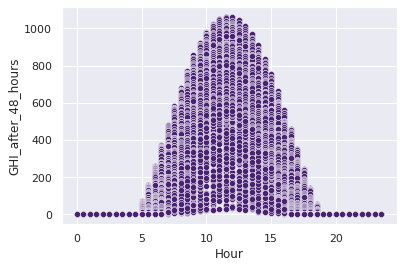

In [14]:
sns.scatterplot(x='Hour',y='GHI_after_48_hours',data=df)

Text(0.5, 1.0, 'Avg Future Hourly00 GHI in different Months')

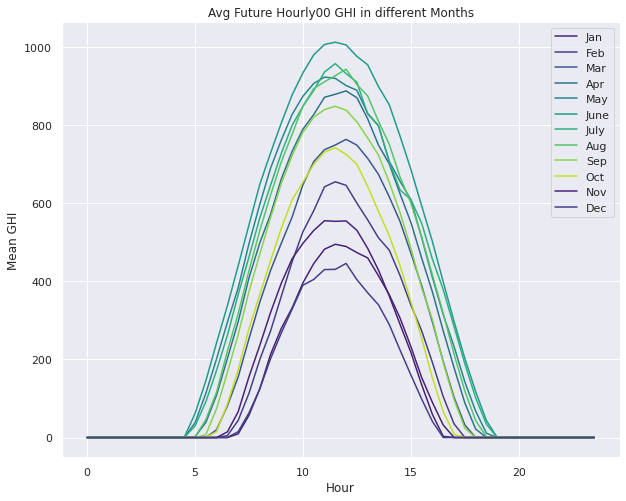

In [15]:
plt.figure(figsize=(10,8))
df[df.Month==1].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='Jan')
df[df.Month==2].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='Feb')
df[df.Month==3].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='Mar')
df[df.Month==4].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='Apr')
df[df.Month==5].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='May')
df[df.Month==6].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='June')
df[df.Month==7].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='July')
df[df.Month==8].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='Aug')
df[df.Month==9].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='Sep')
df[df.Month==10].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='Oct')
df[df.Month==11].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='Nov')
df[df.Month==12].groupby(['Hour']).GHI_after_48_hours.mean().plot(ylabel='Mean GHI',label='Dec')
plt.legend()
plt.title('Avg Future Hourly00 GHI in different Months')

### Month

<AxesSubplot:xlabel='Month', ylabel='GHI_after_48_hours'>

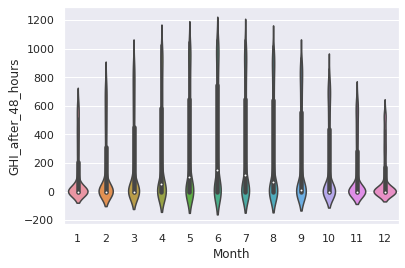

In [16]:
sns.violinplot(data=df,x='Month',y='GHI_after_48_hours')

### Month of July showing more 0 and lower values because of possible rainy season and CLOUD cover

<AxesSubplot:xlabel='Month'>

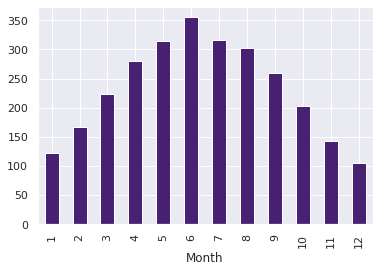

In [17]:
df.groupby('Month').GHI_after_48_hours.mean().plot(kind='bar')

### Trends over the years

In [18]:
# df[df['Year']==2016].groupby('Month').GHI_after_48_hours.mean().plot(kind='bar',title='2016')

In [19]:
# df[df['Year']==2017].groupby('Month').GHI_after_48_hours.mean().plot(kind='bar',title='2017')

<AxesSubplot:title={'center':'2018'}, xlabel='Month'>

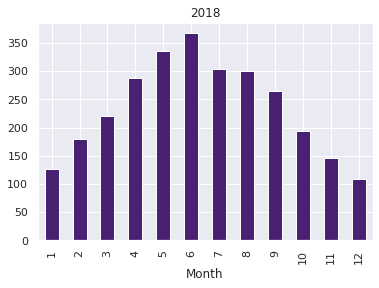

In [20]:
df[df['Year']==2018].groupby('Month').GHI_after_48_hours.mean().plot(kind='bar',title='2018')

<AxesSubplot:title={'center':'2019'}, xlabel='Month'>

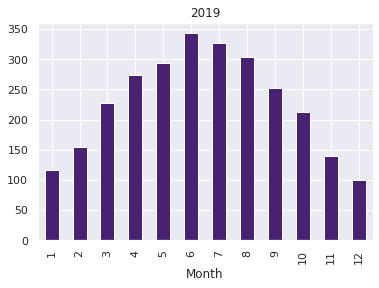

In [21]:
df[df['Year']==2019].groupby('Month').GHI_after_48_hours.mean().plot(kind='bar',title='2019')

### So over the years the highest mean GHI is recorded in June-July and lowest in December and January

## Cloud Type

<AxesSubplot:ylabel='Cloud Type'>

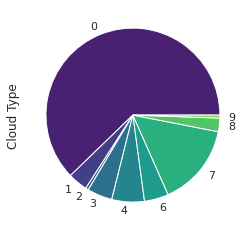

In [22]:
df.groupby('Cloud Type')['Cloud Type'].count().plot(kind='pie')

<AxesSubplot:xlabel='Cloud Type', ylabel='Frequency'>

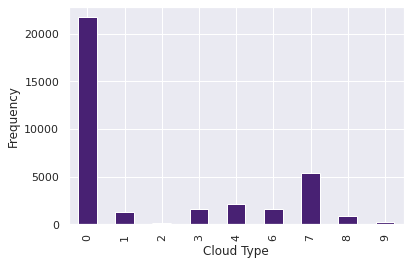

In [23]:
df.groupby('Cloud Type')['Cloud Type'].count().plot(kind='bar',ylabel='Frequency')

<AxesSubplot:xlabel='Cloud Type', ylabel='Mean GHI'>

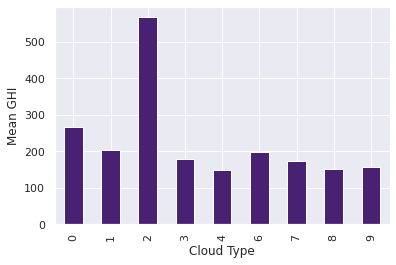

In [24]:
df.groupby('Cloud Type').GHI_after_48_hours.mean().plot(kind='bar',ylabel='Mean GHI')

> ### Cloud Type 2 is impacting the GHI very much

<AxesSubplot:xlabel='Cloud Type', ylabel='GHI_after_48_hours'>

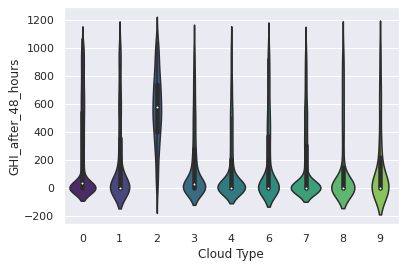

In [25]:
sns.violinplot(data=df,x='Cloud Type',y='GHI_after_48_hours')

> ### cloud type 2 has more impact on future GHI values 

## DEW POINT

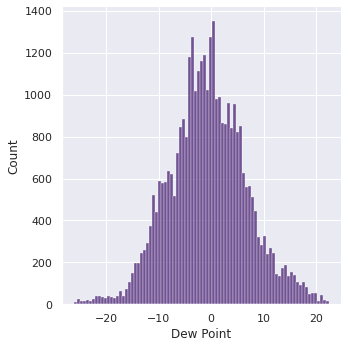

In [26]:
sns.displot(kind='hist', data=df, x= 'Dew Point')

<AxesSubplot:xlabel='Month', ylabel='Dew Point'>

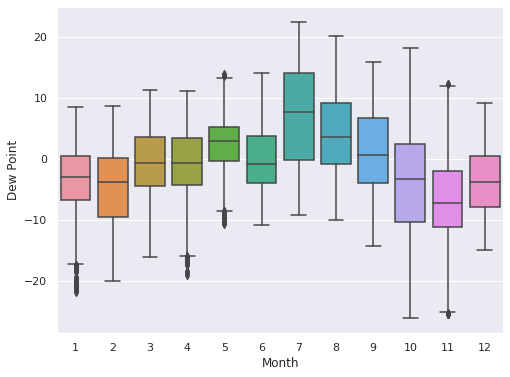

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='Month', y='Dew Point')

In [28]:
df.groupby('Dew Point').GHI_after_48_hours.mean().sort_values(ascending=False).head(20)

Dew Point
 19.2    897.250000
-21.0    737.500000
-25.7    688.500000
-16.4    675.500000
-24.5    659.000000
-23.2    640.250000
-24.7    636.000000
 20.5    628.500000
-23.1    618.500000
 18.6    593.166667
-24.1    571.500000
-16.0    560.800000
-16.7    530.100000
-18.2    521.500000
 12.8    514.708333
-15.5    511.545455
-23.5    506.000000
 13.0    505.545455
-16.3    503.125000
 16.7    482.562500
Name: GHI_after_48_hours, dtype: float64

> ### Negative Dew Points tend to give High GHI after 48 Hours

## Solar Zenith Angle

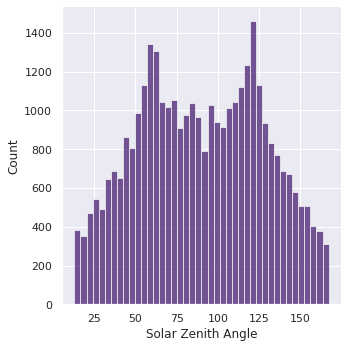

In [29]:
sns.displot(kind='hist',data=df, x='Solar Zenith Angle')

In [30]:
df.groupby('Solar Zenith Angle')['GHI_after_48_hours'].mean().sort_values(ascending=False).head(10)

Solar Zenith Angle
13.15    1063.0
13.54    1062.0
14.83    1061.0
14.09    1060.0
14.97    1060.0
14.98    1059.0
13.11    1058.0
13.29    1053.5
14.03    1053.0
13.30    1051.5
Name: GHI_after_48_hours, dtype: float64

> ### 13-14 degrees has high impact

## Fill Flag

<AxesSubplot:ylabel='Fill Flag'>

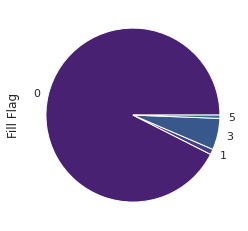

In [31]:
df.groupby('Fill Flag')['Fill Flag'].count().plot(kind='pie')

<AxesSubplot:xlabel='Fill Flag', ylabel='Mean GHI'>

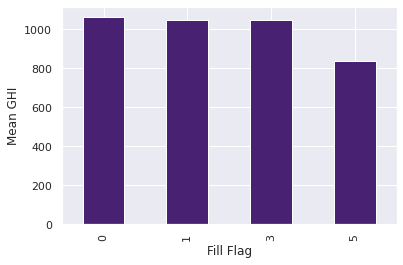

In [32]:
df.groupby('Fill Flag').GHI_after_48_hours.max().plot(kind='bar',ylabel='Mean GHI')

<AxesSubplot:xlabel='Fill Flag', ylabel='GHI_after_48_hours'>

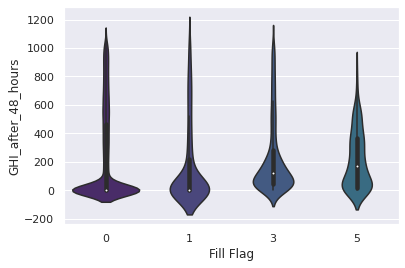

In [33]:
sns.violinplot(data=df,x='Fill Flag',y='GHI_after_48_hours')

## Surface Albedo

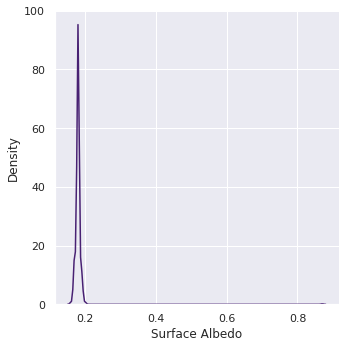

In [34]:
sns.displot(kind='kde',data=df,x='Surface Albedo')

<AxesSubplot:ylabel='Surface Albedo'>

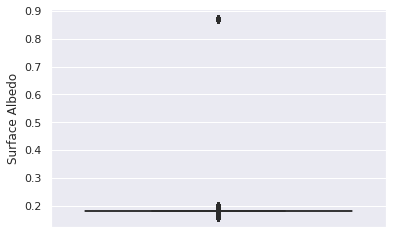

In [35]:
sns.boxplot(data=df,y='Surface Albedo')

### As we can see due to skewed data it is showing noisy outliers

## Wind Speed

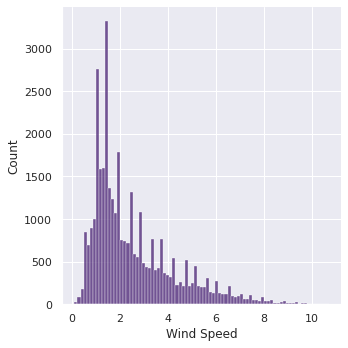

In [36]:
sns.displot(kind='hist',data=df,x='Wind Speed')

<AxesSubplot:ylabel='Wind Speed'>

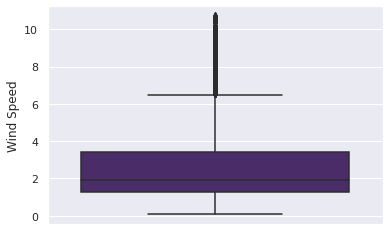

In [37]:
sns.boxplot(data=df, y='Wind Speed')

<AxesSubplot:xlabel='Month', ylabel='Wind Speed'>

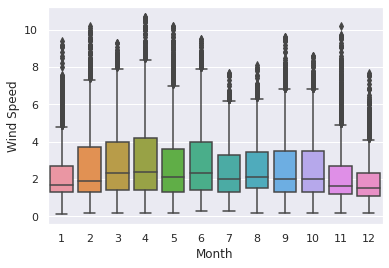

In [38]:
sns.boxplot(data=df, x='Month',y='Wind Speed')

## Precipitable Water

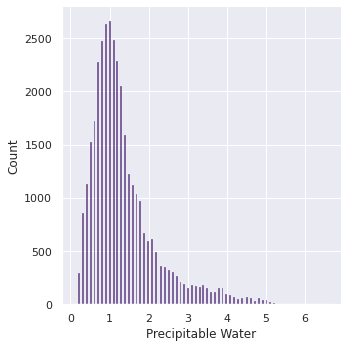

In [39]:
sns.displot(kind='hist',data=df,x='Precipitable Water')

<AxesSubplot:ylabel='Precipitable Water'>

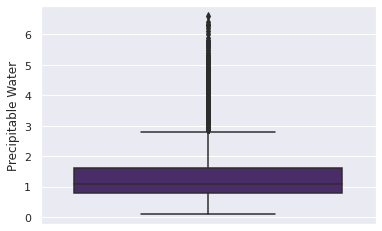

In [40]:
sns.boxplot(data=df,y='Precipitable Water')

<AxesSubplot:xlabel='Month', ylabel='Precipitable Water'>

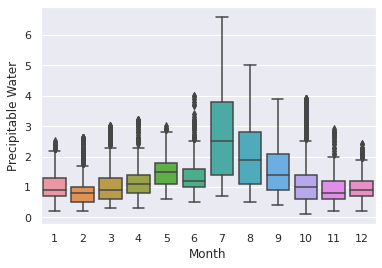

In [41]:
sns.boxplot(data=df,y='Precipitable Water',x='Month')

> ### As Expected Most precioitation in July 

## Wind Direction

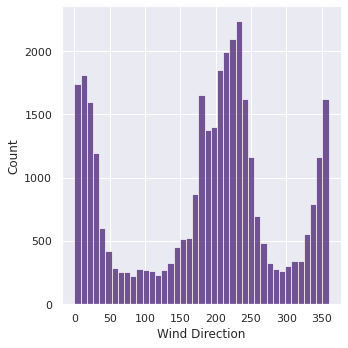

In [42]:
sns.displot(data=df,kind='hist',x='Wind Direction')

In [43]:
df.groupby('Wind Direction')['GHI_after_48_hours'].mean().sort_values(ascending=False).head(10)

Wind Direction
143    552.866667
161    534.089286
152    524.049180
153    510.500000
129    501.909091
155    497.083333
133    496.775000
130    495.916667
140    494.257143
157    494.145833
Name: GHI_after_48_hours, dtype: float64

### Top 10 Mean GHI Forecast Recorded with **130-150** angles

## Relative Humidity

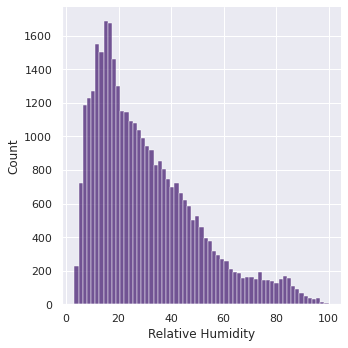

In [44]:
sns.displot(kind='hist',data=df,x='Relative Humidity')

<AxesSubplot:ylabel='Relative Humidity'>

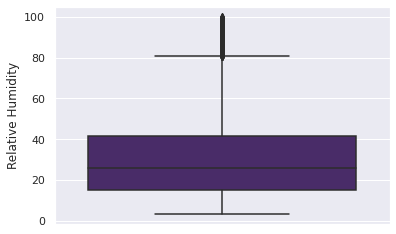

In [45]:
sns.boxplot(data=df,y='Relative Humidity')

<AxesSubplot:xlabel='Month', ylabel='Relative Humidity'>

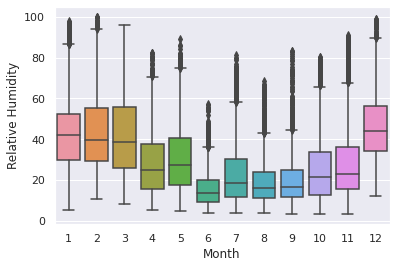

In [46]:
sns.boxplot(data=df,x='Month',y='Relative Humidity')

In [47]:
df.groupby('Relative Humidity')['GHI_after_48_hours'].mean().sort_values(ascending=False).head(10)

Relative Humidity
4.36    1049.000000
6.63    1044.333333
3.78    1040.000000
5.21    1036.000000
4.32    1028.000000
4.23    1025.000000
3.95    1021.000000
5.78    1012.666667
5.23    1011.000000
4.94     989.000000
Name: GHI_after_48_hours, dtype: float64

> ### This Shows That Lower Humidities will Have positive impact on GHI in Future

## Temperature

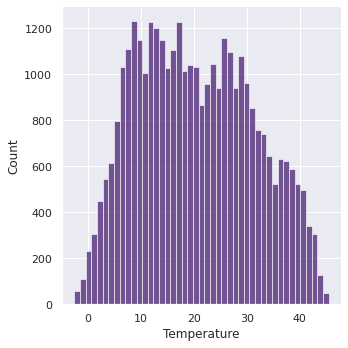

In [48]:
sns.displot(data=df,kind='hist',x='Temperature')

<AxesSubplot:ylabel='Temperature'>

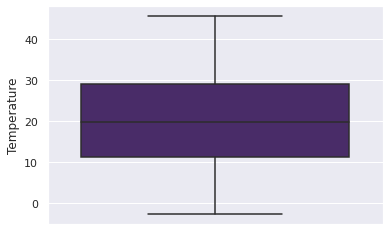

In [49]:
sns.boxplot(data = df,y = 'Temperature')

<AxesSubplot:xlabel='Month', ylabel='Temperature'>

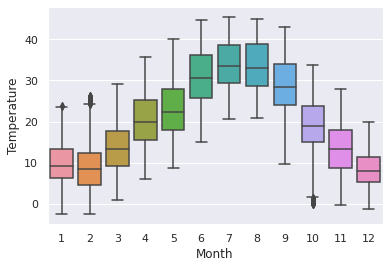

In [50]:
sns.boxplot(data = df,x='Month',y = 'Temperature')

### As You can see Tempertur trend is Normal, Most fluctuations are in July due to Monsoons

In [51]:
df.groupby('Temperature')['GHI_after_48_hours'].mean().sort_values(ascending=False).head(10)

Temperature
44.3    911.333333
43.7    894.538462
45.2    880.666667
45.1    863.333333
43.3    863.181818
43.8    844.230769
44.1    837.000000
42.7    825.333333
42.3    804.703704
42.5    800.961538
Name: GHI_after_48_hours, dtype: float64

### Higher Temperatures are mainly responsible for higher GHI, which is as expected, 
### Thats why Most GHI is recorede in May-April because those months recorded highest avg Temperatures

## Pressure

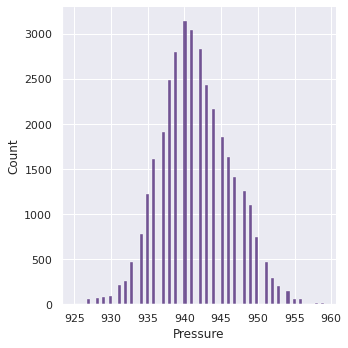

In [52]:
sns.displot(data=df,x='Pressure',kind='hist')

<AxesSubplot:title={'center':'Mean GHI vs Pressure'}, xlabel='Pressure', ylabel='Mean GHI'>

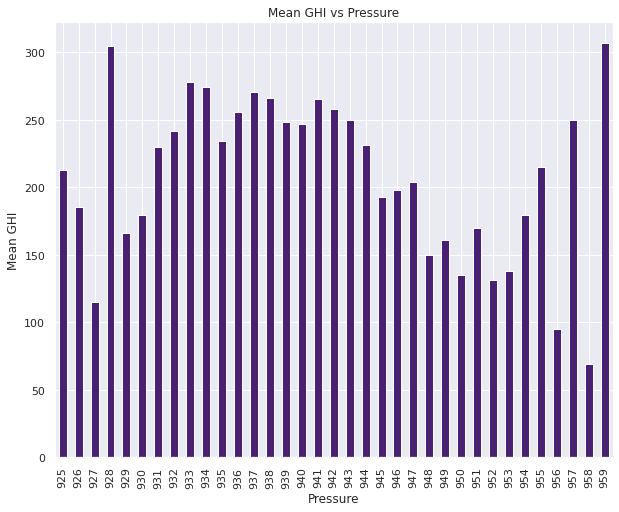

In [53]:
plt.figure(figsize=(10,8))
df.groupby('Pressure')['GHI_after_48_hours'].mean().plot(kind='bar',ylabel='Mean GHI',title='Mean GHI vs Pressure')

### EDA Finished

# Model Building 

### For Model building and Selection we will use automated Library Pycaret 🥕

### Setup (Dividing the dataset into 50-50 test train ratio for efficient results)

In [54]:

X = df.drop(['Year'],axis=1)
y= df['GHI_after_48_hours']
X_train,  X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=0.5)

### Further dividing the train set into train and dev set into 80-20 ratio

In [55]:
from pycaret.regression import *
log = setup(data=X_train, target='GHI_after_48_hours',train_size=0.8,
            silent=True, feature_selection=True, feature_interaction=True )

,Description,Value
0,session_id,2364
1,Target,GHI_after_48_hours
2,Original Data,"(17472, 15)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(13977, 58)"


### Model Selection

In [56]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,30.6312,4331.0641,65.7204,0.9571,1.1023,0.3771,8.4970
lightgbm,Light Gradient Boosting Machine,31.3625,4848.1395,69.5587,0.9520,0.6869,0.3948,0.3530
xgboost,Extreme Gradient Boosting,31.6850,4971.5899,70.4465,0.9508,0.9833,0.3866,29.7740
rf,Random Forest Regressor,35.1422,6119.2367,78.1816,0.9395,0.3287,0.4351,9.7160
gbr,Gradient Boosting Regressor,36.8639,6116.4332,78.1077,0.9395,0.9652,0.4508,4.4400
et,Extra Trees Regressor,34.9453,6241.9408,78.9693,0.9383,0.3299,0.4377,3.1390
knn,K Neighbors Regressor,38.8885,7981.7974,89.2445,0.9210,0.3680,0.4789,0.0930
dt,Decision Tree Regressor,43.1016,11630.7162,107.7903,0.8850,0.4471,0.4816,0.1870
ada,AdaBoost Regressor,62.8066,12903.5175,113.5154,0.8725,0.7868,0.5170,0.7210
br,Bayesian Ridge,91.6890,14922.3754,122.1389,0.8524,2.8888,0.9724,0.0470


> ## Catboost Regressor is the Most accurate model according to R2 value

### Building individual and Blend of top 

In [57]:
cb = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,28.8214,3325.9890,57.6714,0.9674,1.1006,0.3492
1,30.2571,4088.4814,63.9412,0.9606,1.0921,0.2812
2,30.6201,3994.6857,63.2035,0.9611,1.1309,0.4406
3,30.8612,4251.2527,65.2016,0.9591,1.1153,0.4862
4,31.0479,4487.2312,66.9868,0.9539,1.0892,0.3480
5,30.3934,4212.4314,64.9032,0.9584,1.1266,0.3057
6,30.1561,4623.0200,67.9928,0.9536,1.1358,0.3610
7,31.6842,4960.1556,70.4284,0.9489,1.0919,0.3654
8,30.9082,4687.7130,68.4669,0.9543,1.0865,0.3725
9,31.5628,4679.6806,68.4082,0.9542,1.0540,0.4609


In [58]:
lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,29.1018,3842.9378,61.9914,0.9623,0.6839,0.3669
1,30.4900,4421.1843,66.4920,0.9573,0.6868,0.2827
2,31.9540,4675.7950,68.3798,0.9545,0.6776,0.4497
3,31.6053,4912.3330,70.0880,0.9527,0.6956,0.4785
4,31.5827,4867.9874,69.7710,0.9500,0.6886,0.3720
5,31.5781,5039.3507,70.9884,0.9502,0.7207,0.3354
6,31.2473,5168.1552,71.8899,0.9482,0.6605,0.3769
7,32.7379,5340.9087,73.0815,0.9449,0.7186,0.3722
8,31.0265,4971.2402,70.5070,0.9515,0.6812,0.3904
9,32.3008,5241.5027,72.3982,0.9488,0.6558,0.5235


In [59]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,35.2161,4919.3122,70.1378,0.9517,1.0015,0.4184
1,35.5453,5595.1512,74.8007,0.9460,0.9680,0.3137
2,37.5591,5936.7442,77.0503,0.9422,0.9365,0.5093
3,38.3205,6347.9129,79.6738,0.9389,1.0219,0.5815
4,37.3133,6091.7511,78.0497,0.9374,0.9670,0.4144
5,36.0034,5943.1414,77.0918,0.9413,0.9333,0.3766
6,36.4180,6462.9207,80.3923,0.9352,0.9516,0.4188
7,38.0437,7424.7861,86.1672,0.9235,0.9383,0.4329
8,36.3117,5952.1582,77.1502,0.9420,0.9839,0.4525
9,37.9076,6490.4538,80.5634,0.9365,0.9502,0.5899


In [60]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,33.9068,5525.4484,74.3334,0.9458,0.3272,0.4200
1,33.9644,5992.5085,77.4113,0.9422,0.2703,0.3151
2,34.9791,5856.4512,76.5275,0.9430,0.3508,0.4864
3,35.3316,6543.5672,80.8923,0.9370,0.3663,0.5265
4,35.9276,6577.0866,81.0992,0.9324,0.3362,0.4157
5,34.4233,5961.9002,77.2133,0.9411,0.2938,0.3511
6,34.3711,6336.8804,79.6045,0.9364,0.3062,0.4052
7,36.1532,6737.6710,82.0833,0.9305,0.3221,0.4103
8,34.8738,6239.1889,78.9885,0.9392,0.3378,0.4470
9,35.5217,6648.7051,81.5396,0.9350,0.3882,0.5992


In [61]:
xgb = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,30.4395,4118.3481,64.1744,0.9596,0.9736,0.3628
1,32.0291,4875.7632,69.8267,0.9530,0.9947,0.2693
2,31.3372,4379.5596,66.1782,0.9574,1.0391,0.4510
3,32.5188,4918.9326,70.1351,0.9527,1.0064,0.4875
4,31.5098,4950.6953,70.3612,0.9491,0.9753,0.3595
5,31.2387,5080.4668,71.2774,0.9498,0.9350,0.2942
6,31.4975,5209.0527,72.1738,0.9478,0.9420,0.3710
7,31.6607,5400.8892,73.4907,0.9443,0.9362,0.3774
8,31.8875,5418.9751,73.6137,0.9472,1.0203,0.3893
9,32.7313,5363.2163,73.2340,0.9476,1.0109,0.5040


## Blend of CatBoost, LGBM, XGBOOST and GBR

In [62]:
blender = blend_models(estimator_list=[cb,lgbm])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,28.3354,3424.5903,58.5200,0.9664,0.8597,0.3537
1,29.6671,4129.6343,64.2622,0.9602,0.8642,0.2772
2,30.6639,4197.3200,64.7867,0.9591,0.8933,0.4397
3,30.6351,4443.3491,66.6585,0.9572,0.8816,0.4778
4,30.8031,4549.7669,67.4520,0.9532,0.8703,0.3551
5,30.3722,4479.5110,66.9291,0.9558,0.8946,0.3160
6,30.0932,4769.4389,69.0611,0.9522,0.8783,0.3577
7,31.4319,4979.0801,70.5626,0.9487,0.8601,0.3616
8,30.3134,4692.0616,68.4986,0.9543,0.8689,0.3748
9,31.2837,4808.4981,69.3433,0.9530,0.8260,0.4840


## Stack Model

In [63]:
stacker = stack_models(estimator_list=[cb,lgbm])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,28.8877,3314.0632,57.5679,0.9675,1.1631,0.3495
1,30.5711,4077.9222,63.8586,0.9607,1.1878,0.2797
2,30.9908,4005.0247,63.2853,0.9610,1.2413,0.4390
3,30.9895,4229.3519,65.0335,0.9593,1.1916,0.4917
4,31.3916,4465.5487,66.8248,0.9541,1.1924,0.3531
5,30.7257,4266.4592,65.3181,0.9579,1.1910,0.3089
6,30.4847,4620.7681,67.9762,0.9537,1.1976,0.3600
7,31.8975,4949.4497,70.3523,0.9490,1.1499,0.3652
8,30.9256,4645.7836,68.1600,0.9547,1.1698,0.3776
9,31.8548,4677.1844,68.3899,0.9543,1.1707,0.4597


# Analysing Models

## Catboost

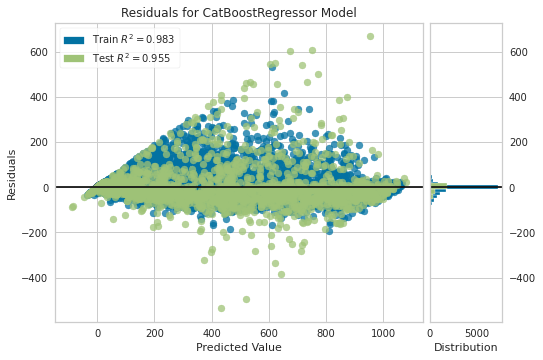

In [64]:
plot_model(cb)

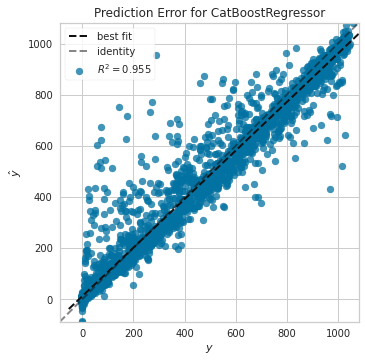

In [65]:
plot_model(cb, plot='error')

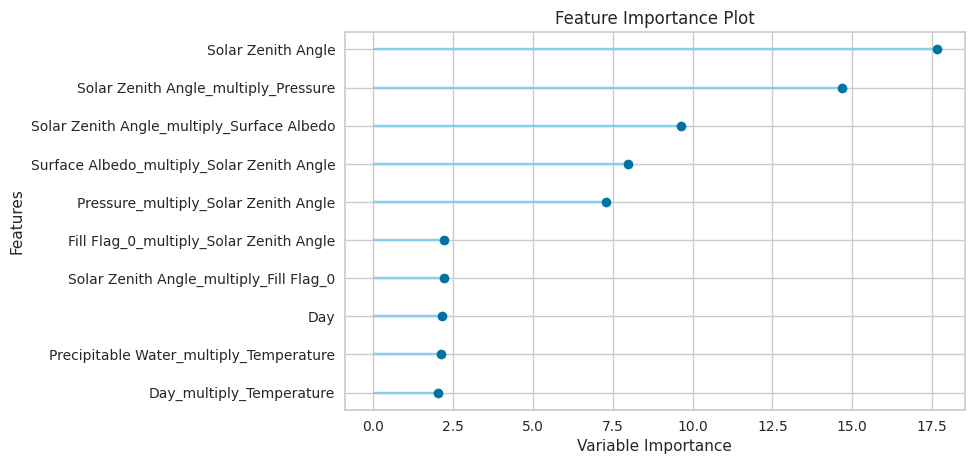

In [66]:
plot_model(cb, plot='feature')

## LGBM

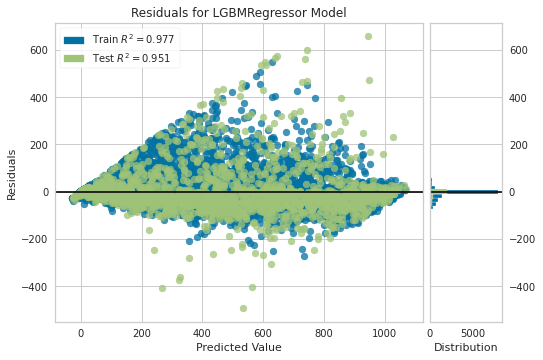

In [67]:
plot_model(lgbm)

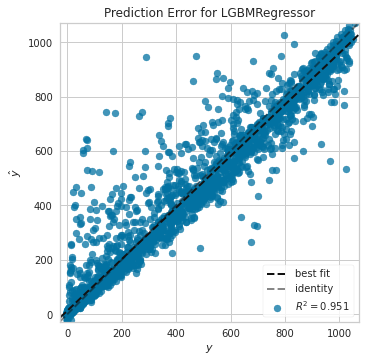

In [68]:
plot_model(lgbm, plot='error')

## GBoost

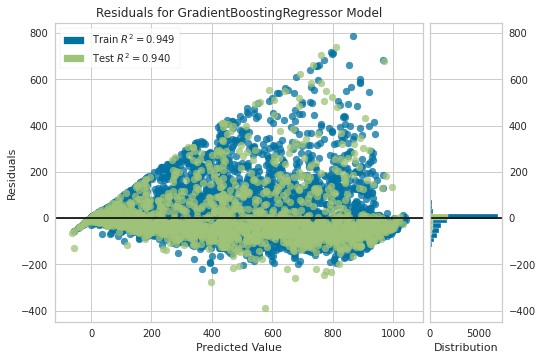

In [69]:
plot_model(gbr)

## XGboost

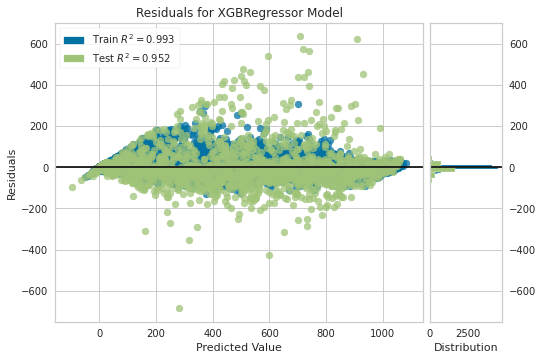

In [70]:
plot_model(xgb)

### It's overfitting train data a little

## Extra Tree

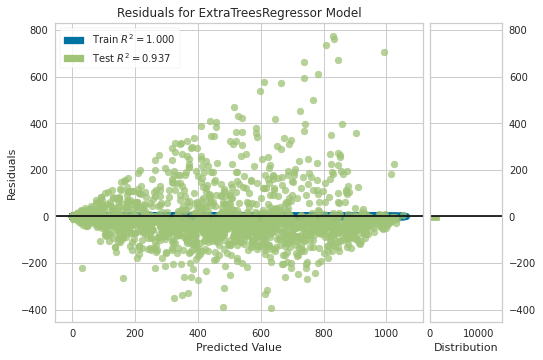

In [71]:
plot_model(et)

### We can see that this model has overfitted the data alot, so we will not use it in Blend or stack Model

## Blender

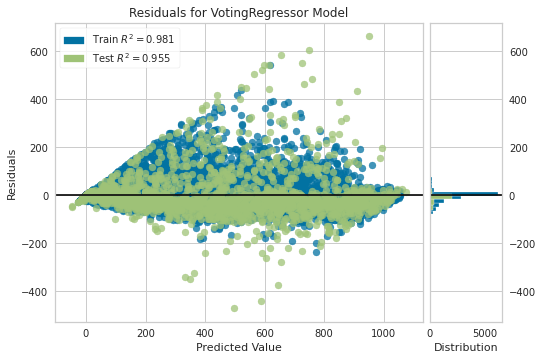

In [72]:
plot_model(blender)

## Stacker

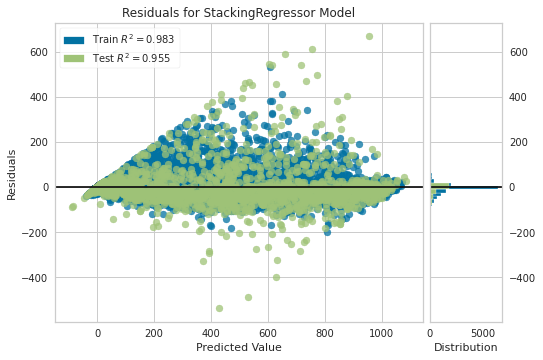

In [73]:
plot_model(stacker)

# Interpreting Model

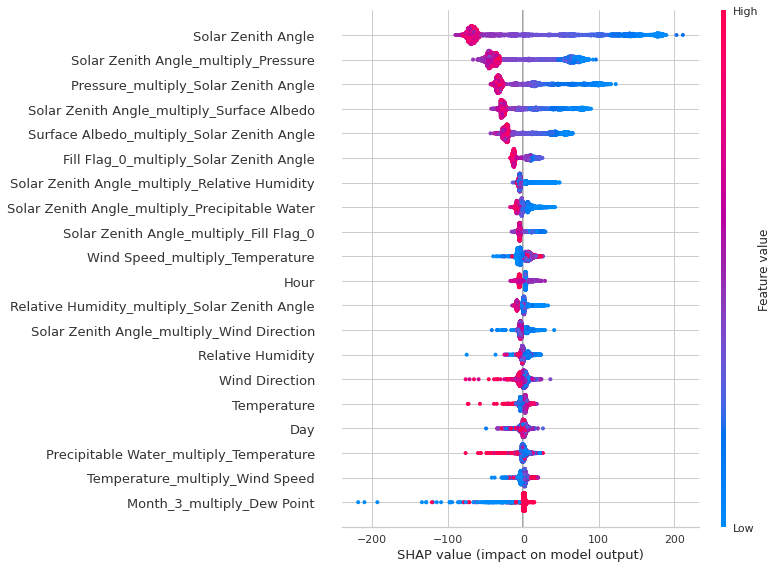

In [74]:
interpret_model(cb)

> ## We can understand with the help of SHAP value how high and low values of a feature affect the predictions

> ### Training set R2_score

In [75]:
pred1 = predict_model(cb, data=X_train.drop(['GHI_after_48_hours'],axis=1))
l=[]
for i in pred1['Label']:
    if i <0:
        l.append(0)
    else:
        l.append(int(i))
        
pred1['Label'] = l

In [76]:
from sklearn.metrics import r2_score
r2_score(X_train['GHI_after_48_hours'],pred1['Label'])

0.9772047207824748

> ### Test/Holdout Set R2_score

In [77]:
models = [cb,lgbm,gbr,et,xgb,blender,stacker]
models2 = ['cb','lgbm','gbr','et','xgb','blender','stacker']
r2=[]

In [78]:
for i in models:
    pred2 = predict_model(i, data=X_test.drop(['GHI_after_48_hours'],axis=1))
    l=[]
    for j in pred2['Label']:
        if j <0:
            l.append(0)
        else:
            l.append(int(j))
        
    pred2['Label'] = l

    r2.append(r2_score(X_test['GHI_after_48_hours'],pred2['Label']))
    
df3 = pd.DataFrame({'Model':models2, 'Test_R2':r2})

In [79]:
df3

,Model,Test_R2
0,cb,0.958746
1,lgbm,0.953374
2,gbr,0.940869
3,et,0.941164
4,xgb,0.953636
5,blender,0.957369
6,stacker,0.958794


> 

### Predicted value comparison

In [80]:
def fun(l):
    new_l=[]
    for j in l:
        if j <0:
            new_l.append(0)
        else:
            new_l.append(int(j))
        
    return new_l

In [81]:
df_comp = pd.DataFrame({'True GHI': X_test['GHI_after_48_hours'],'Predicted GHI':fun(predict_model(stacker,data=X_test.drop(['GHI_after_48_hours'],axis=1))['Label'])})
df_comp.head(40)

,True GHI,Predicted GHI
31002,456,596
22388,0,1
45578,0,8
49439,716,694
45220,839,667
19552,0,0
52438,0,0
19302,392,362
34933,0,0
25138,47,49


## Will Keep updating with further steps, Stay tuned!! 